In [27]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re

In [28]:
Rank = []; Id = []; Category = []; Name = []; Country = []; Followers = []; Likes = []; Views = []

In [29]:
for i in range(1,11):
    url = f"https://hypeauditor.com/top-instagram/?p={i}"
    #print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    soup.prettify
    
    a = soup.find_all("div",class_="row-cell rank")
    b = soup.find_all("div",class_="contributor__name-content")
    c = soup.find_all("div",class_="row-cell category")
    d = soup.find_all("div",class_="contributor__title")
    e = soup.find_all("div",class_="row-cell audience")
    f = soup.find_all("div",class_="row-cell subscribers")
    g = soup.find_all("div",class_="row-cell authentic")
    h = soup.find_all("div",class_="row-cell engagement")
    
#Rank
    for i in a:
        text=i.text
        Rank.append(text)
            
#insta id  
    for i in b:
        text = i.text
        Id.append(text)
        
#category
    for i in c:
        text=i.text
        if text:
            Category.append(text)
        else:
            Category.append(np.nan)
            
#name
    for i in d:
        text=i.text
        Name.append(text)
#country
    for i in e:
        text=i.text
        Country.append(text)
        
#followers
    for i in f:
        text=i.text
        Followers.append(text)
        
#likes
    for i in g:
        text=i.text
        Likes.append(text)
        
        
#views
    for i in h:
        text=i.text
        Views.append(text)
        

In [30]:
len(Name)

490

In [31]:
Name.insert(155,np.nan)
Name.insert(159,np.nan)
Name.insert(204,np.nan)
Name.insert(209,np.nan)
Name.insert(269,np.nan)
Name.insert(313,np.nan)
Name.insert(328,np.nan)
Name.insert(455,np.nan)
Name.insert(464,np.nan)
Name.insert(495,np.nan)


In [32]:
d={'Rank':Rank,'Influencer':Id,'Name':Name,'Category':Category,'Country':Country,'Followers(M)':Followers,'Likes':Likes,'Views':Views}


In [33]:
df = pd.DataFrame(d)
df

,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
0,1,cristiano,Cristiano Ronaldo,Sports with a ball,India,560.9M,6.1M,7.7M
1,2,selenagomez,Selena Gomez,PhotographyMusic,United States,399.3M,6.5M,8.6M
2,3,leomessi,Leo Messi,Sports with a ballFamily,Argentina,445.3M,3.6M,4.7M
3,4,kyliejenner,Kylie,FashionModelingBeauty,United States,381.6M,2.7M,4.2M
4,5,kendalljenner,Kendall,ModelingFashion,United States,279.3M,2.7M,4.2M
...,...,...,...,...,...,...,...,...
495,496,adinross,NaN,NaN,United States,4.8M,758.4K,1.2M
496,497,nickjonas,Nick Jonas,MusicArt/Artists,United States,33.9M,106.8K,151.8K
497,498,7_luhan_m,鹿 Han,Music,Indonesia,12.7M,337.2K,409.3K
498,499,e_milygarcia,Emily Garcia,Cinema & Actors/actresses,Brazil,12.3M,252.3K,416.9K


In [34]:
df.to_csv('instafollowers.csv')

In [35]:
data = pd.read_csv('instafollowers.csv')

In [36]:
data

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
0,0,1,cristiano,Cristiano Ronaldo,Sports with a ball,India,560.9M,6.1M,7.7M
1,1,2,selenagomez,Selena Gomez,PhotographyMusic,United States,399.3M,6.5M,8.6M
2,2,3,leomessi,Leo Messi,Sports with a ballFamily,Argentina,445.3M,3.6M,4.7M
3,3,4,kyliejenner,Kylie,FashionModelingBeauty,United States,381.6M,2.7M,4.2M
4,4,5,kendalljenner,Kendall,ModelingFashion,United States,279.3M,2.7M,4.2M
...,...,...,...,...,...,...,...,...,...
495,495,496,adinross,NaN,NaN,United States,4.8M,758.4K,1.2M
496,496,497,nickjonas,Nick Jonas,MusicArt/Artists,United States,33.9M,106.8K,151.8K
497,497,498,7_luhan_m,鹿 Han,Music,Indonesia,12.7M,337.2K,409.3K
498,498,499,e_milygarcia,Emily Garcia,Cinema & Actors/actresses,Brazil,12.3M,252.3K,416.9K


In [37]:
data['Followers(M)']=data['Followers(M)'].replace('M','',regex=True).map(pd.eval)
data['Likes']=data['Likes'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval)
data['Views']=data['Views'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval)

In [38]:
data

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
0,0,1,cristiano,Cristiano Ronaldo,Sports with a ball,India,560.9,6100000.0,7700000.0
1,1,2,selenagomez,Selena Gomez,PhotographyMusic,United States,399.3,6500000.0,8600000.0
2,2,3,leomessi,Leo Messi,Sports with a ballFamily,Argentina,445.3,3600000.0,4700000.0
3,3,4,kyliejenner,Kylie,FashionModelingBeauty,United States,381.6,2700000.0,4200000.0
4,4,5,kendalljenner,Kendall,ModelingFashion,United States,279.3,2700000.0,4200000.0
...,...,...,...,...,...,...,...,...,...
495,495,496,adinross,NaN,NaN,United States,4.8,758400.0,1200000.0
496,496,497,nickjonas,Nick Jonas,MusicArt/Artists,United States,33.9,106800.0,151800.0
497,497,498,7_luhan_m,鹿 Han,Music,Indonesia,12.7,337200.0,409300.0
498,498,499,e_milygarcia,Emily Garcia,Cinema & Actors/actresses,Brazil,12.3,252300.0,416900.0


# data cleaning

In [39]:
data.isnull().sum()

Unnamed: 0       0
Rank             0
Influencer       0
Name            10
Category        20
Country          0
Followers(M)     0
Likes            0
Views            0
dtype: int64

In [40]:
data['Name'] = data['Name'].fillna('No_name')

In [41]:
data.fillna(method='ffill',inplace = True)

In [42]:
data

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
0,0,1,cristiano,Cristiano Ronaldo,Sports with a ball,India,560.9,6100000.0,7700000.0
1,1,2,selenagomez,Selena Gomez,PhotographyMusic,United States,399.3,6500000.0,8600000.0
2,2,3,leomessi,Leo Messi,Sports with a ballFamily,Argentina,445.3,3600000.0,4700000.0
3,3,4,kyliejenner,Kylie,FashionModelingBeauty,United States,381.6,2700000.0,4200000.0
4,4,5,kendalljenner,Kendall,ModelingFashion,United States,279.3,2700000.0,4200000.0
...,...,...,...,...,...,...,...,...,...
495,495,496,adinross,No_name,Music,United States,4.8,758400.0,1200000.0
496,496,497,nickjonas,Nick Jonas,MusicArt/Artists,United States,33.9,106800.0,151800.0
497,497,498,7_luhan_m,鹿 Han,Music,Indonesia,12.7,337200.0,409300.0
498,498,499,e_milygarcia,Emily Garcia,Cinema & Actors/actresses,Brazil,12.3,252300.0,416900.0


In [43]:
data['Followers(M)'].describe()

count    500.000000
mean      39.407000
std       64.888849
min        2.100000
25%       13.200000
50%       21.550000
75%       39.100000
max      618.500000
Name: Followers(M), dtype: float64

# data analysis


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


top 10 most followed persons

In [45]:
a = data.sort_values(by = 'Followers(M)',ascending = False).head(10)
a

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
26,26,27,instagram,Instagram,Photography,India,618.5,295900.0,368100.0
0,0,1,cristiano,Cristiano Ronaldo,Sports with a ball,India,560.9,6100000.0,7700000.0
2,2,3,leomessi,Leo Messi,Sports with a ballFamily,Argentina,445.3,3600000.0,4700000.0
1,1,2,selenagomez,Selena Gomez,PhotographyMusic,United States,399.3,6500000.0,8600000.0
3,3,4,kyliejenner,Kylie,FashionModelingBeauty,United States,381.6,2700000.0,4200000.0
28,28,29,therock,Dwayne Johnson,Fitness & GymCinema & Actors/actresses,India,369.8,431300.0,552900.0
6,6,7,arianagrande,Ariana Grande,Music,United States,361.1,1800000.0,2400000.0
11,11,12,kimkardashian,Kim Kardashian,FashionBeauty,United States,348.6,1000000.0,1500000.0
5,5,6,justinbieber,Justin Bieber,Music,Brazil,282.2,2400000.0,3300000.0
4,4,5,kendalljenner,Kendall,ModelingFashion,United States,279.3,2700000.0,4200000.0


<function matplotlib.pyplot.show(close=None, block=None)>

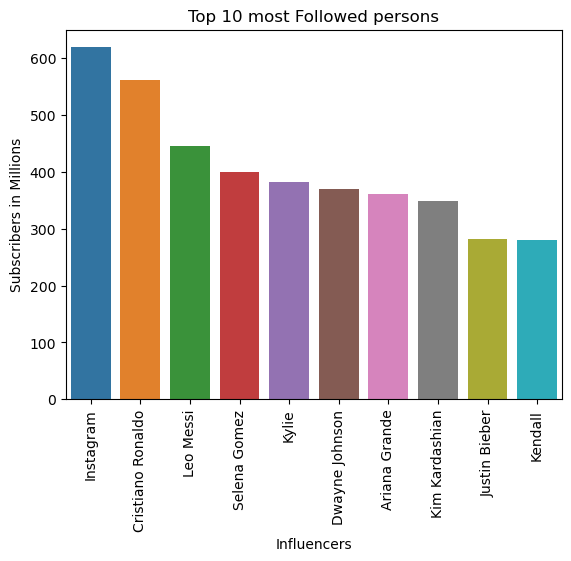

In [46]:
sns.barplot(x = 'Name',y = 'Followers(M)', data = a)
plt.title('Top 10 most Followed persons')
plt.xlabel('Influencers')
plt.ylabel('Subscribers in Millions')
plt.xticks(rotation = 90)
plt.show

In [47]:
data['Category'].value_counts()

Music                                        105
Cinema & Actors/actresses                     92
Sports with a ball                            73
Lifestyle                                     22
LifestyleMusic                                12
                                            ... 
FamilyMusic                                    1
LifestyleArt/Artists                           1
Humor & Fun & HappinessClothing & Outfits      1
MusicBeauty                                    1
MusicCinema & Actors/actressesModeling         1
Name: Category, Length: 103, dtype: int64

In [48]:
x = data[(data['Category']=='Music') & (data['Followers(M)']>100.0)]

In [49]:
x = x.sort_values(by = 'Followers(M)',ascending = False).head()
x

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
6,6,7,arianagrande,Ariana Grande,Music,United States,361.1,1800000.0,2400000.0
5,5,6,justinbieber,Justin Bieber,Music,Brazil,282.2,2400000.0,3300000.0
30,30,31,nickiminaj,Barbie,Music,United States,213.1,531600.0,839500.0
31,31,32,mileycyrus,Miley Cyrus,Music,United States,200.3,620600.0,835100.0
82,82,83,katyperry,KATY PERRY,Music,Brazil,194.0,193700.0,249800.0


<function matplotlib.pyplot.show(close=None, block=None)>

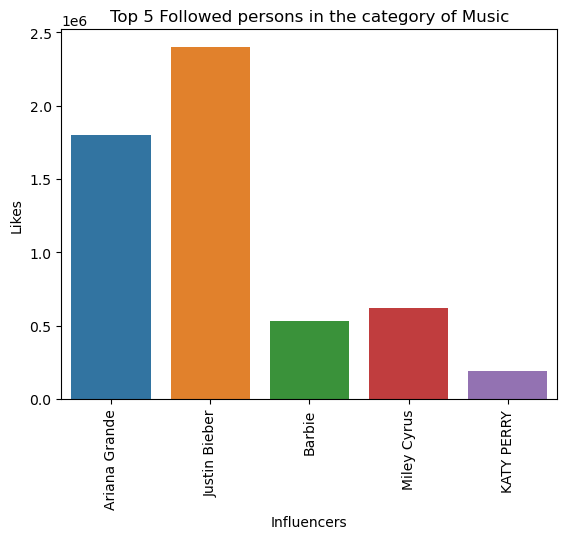

In [50]:
sns.barplot(x = 'Name', y = 'Likes',data = x)
plt.title('Top 5 Followed persons in the category of Music')
plt.xlabel('Influencers')
plt.ylabel('Likes')
plt.xticks(rotation = 90)
plt.show

<AxesSubplot:>

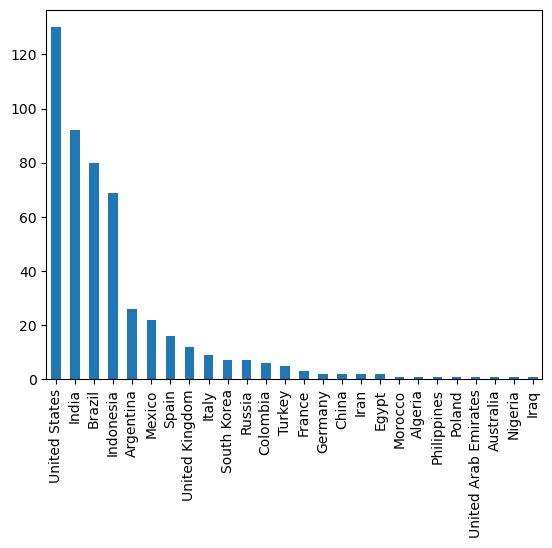

In [83]:
data['Country'].value_counts().plot.bar()

<AxesSubplot:ylabel='Category'>

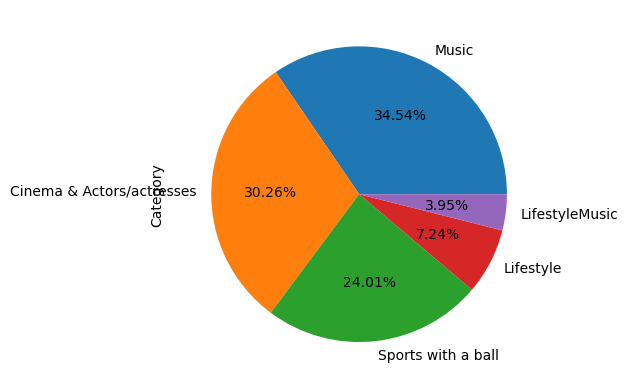

In [111]:
b= data[(data['Category']=='Music') | (data['Category'] == 'Cinema & Actors/actresses') | (data['Category'] == 'Sports with a ball') | (data['Category'] == 'Lifestyle') | (data['Category'] == 'LifestyleMusic')]
b['Category'].value_counts().plot.pie(autopct = '%.2f%%')

In [53]:
b

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
0,0,1,cristiano,Cristiano Ronaldo,Sports with a ball,India,560.9,6100000.0,7700000.0
5,5,6,justinbieber,Justin Bieber,Music,Brazil,282.2,2400000.0,3300000.0
6,6,7,arianagrande,Ariana Grande,Music,United States,361.1,1800000.0,2400000.0
7,7,8,neymarjr,NJ 🇧🇷,Sports with a ball,Brazil,206.8,2700000.0,3900000.0
8,8,9,billieeilish,BILLIE EILISH,Music,United States,108.5,5000000.0,6500000.0
...,...,...,...,...,...,...,...,...,...
494,494,495,sugaringcandy,JUNGWOO,Music,South Korea,4.4,1100000.0,1200000.0
495,495,496,adinross,No_name,Music,United States,4.8,758400.0,1200000.0
497,497,498,7_luhan_m,鹿 Han,Music,Indonesia,12.7,337200.0,409300.0
498,498,499,e_milygarcia,Emily Garcia,Cinema & Actors/actresses,Brazil,12.3,252300.0,416900.0


<AxesSubplot:>

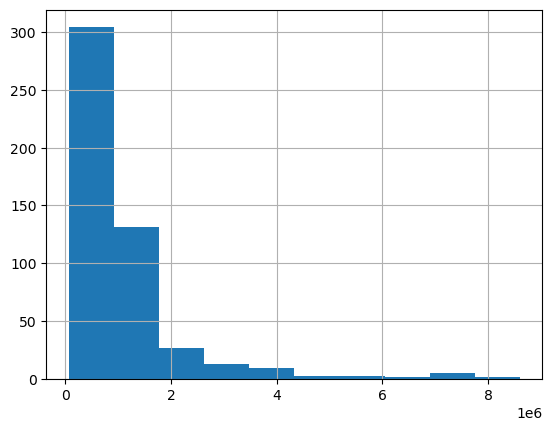

In [54]:
data['Views'].hist()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

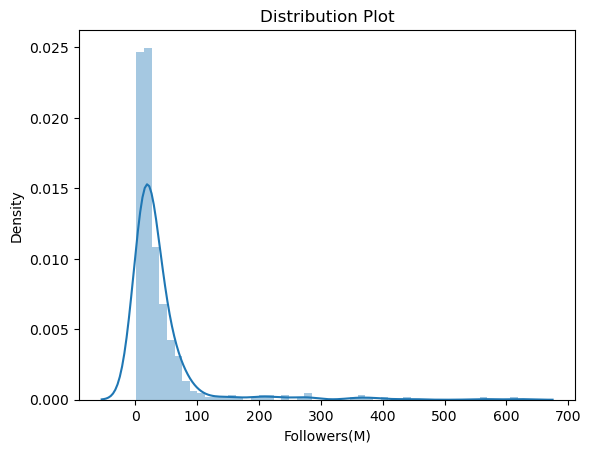

In [55]:
sns.distplot(data['Followers(M)'])
plt.title('Distribution Plot')


top 10  Influencers in india by Followers

In [60]:
z = b=data[(data['Country']=='India')]
d = z.nlargest(10,'Followers(M)')
d

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
26,26,27,instagram,Instagram,Photography,India,618.5,295900.0,368100.0
0,0,1,cristiano,Cristiano Ronaldo,Sports with a ball,India,560.9,6100000.0,7700000.0
28,28,29,therock,Dwayne Johnson,Fitness & GymCinema & Actors/actresses,India,369.8,431300.0,552900.0
15,15,16,virat.kohli,Virat Kohli,Sports with a ball,India,240.6,1300000.0,1400000.0
42,42,43,nasa,NASA,SciencePhotography,India,90.3,991000.0,1200000.0
138,138,139,priyankachopra,Priyanka,Cinema & Actors/actresses,India,85.8,257500.0,288300.0
61,61,62,khaby00,Khaby Lame,Sports with a ball,India,79.1,662100.0,910800.0
91,91,92,davidbeckham,David Beckham,FamilySports with a ball,India,78.2,364600.0,487100.0
48,48,49,shraddhakapoor,Shraddha ✶,Cinema & Actors/actresses,India,77.7,996900.0,1200000.0
34,34,35,aliaabhatt,Alia Bhatt 💛,Cinema & Actors/actresses,India,75.9,1600000.0,2000000.0


<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128155 (\N{YELLOW HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


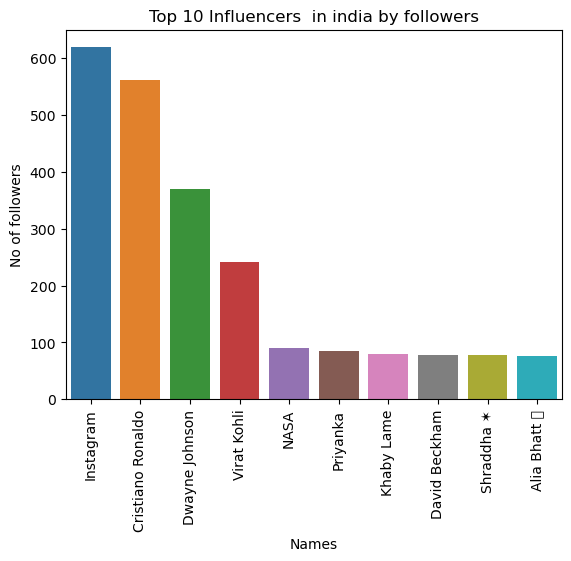

In [64]:
sns.barplot(x = 'Name', y = 'Followers(M)',data = d)
plt.title('Top 10 Influencers  in india by followers')
plt.xlabel('Names')
plt.ylabel('No of followers')
plt.xticks(rotation = 90)
plt.show

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot')

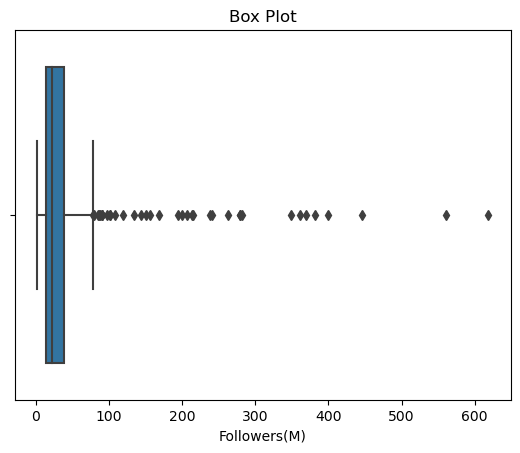

In [66]:
sns.boxplot(data['Followers(M)'])
plt.title('Box Plot')


In [71]:
f = data[data['Followers(M)']> 100.0]
f.head()

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
0,0,1,cristiano,Cristiano Ronaldo,Sports with a ball,India,560.9,6100000.0,7700000.0
1,1,2,selenagomez,Selena Gomez,PhotographyMusic,United States,399.3,6500000.0,8600000.0
2,2,3,leomessi,Leo Messi,Sports with a ballFamily,Argentina,445.3,3600000.0,4700000.0
3,3,4,kyliejenner,Kylie,FashionModelingBeauty,United States,381.6,2700000.0,4200000.0
4,4,5,kendalljenner,Kendall,ModelingFashion,United States,279.3,2700000.0,4200000.0


In [70]:
f.shape

(28, 9)

In [73]:
k = data[data['Followers(M)']< 100.0]
k

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
9,9,10,lalalalisa_m,LISA,Music,Indonesia,90.1,5900000.0,6800000.0
10,10,11,jennierubyjane,J,Music,Indonesia,76.1,6000000.0,7200000.0
14,14,15,roses_are_rosie,ROSÉ,Music,Indonesia,68.0,4700000.0,5400000.0
16,16,17,jin,Jin of BTS,Music,United States,44.6,7600000.0,7600000.0
18,18,19,karolg,KAROL G,Music,Mexico,60.7,4500000.0,5400000.0
...,...,...,...,...,...,...,...,...,...
495,495,496,adinross,No_name,Music,United States,4.8,758400.0,1200000.0
496,496,497,nickjonas,Nick Jonas,MusicArt/Artists,United States,33.9,106800.0,151800.0
497,497,498,7_luhan_m,鹿 Han,Music,Indonesia,12.7,337200.0,409300.0
498,498,499,e_milygarcia,Emily Garcia,Cinema & Actors/actresses,Brazil,12.3,252300.0,416900.0


# followers count

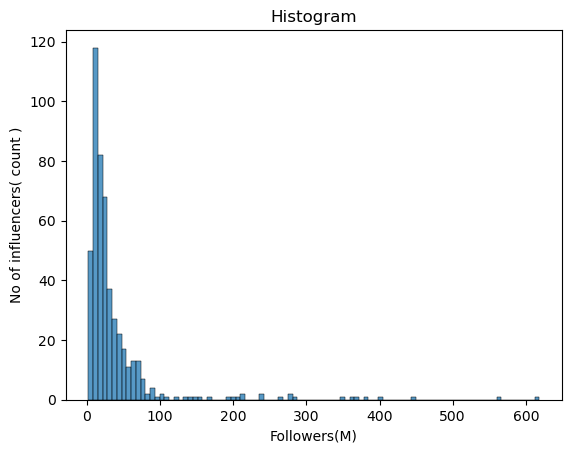

In [75]:
sns.histplot(data['Followers(M)'])
plt.title('Histogram')
plt.ylabel('No of influencers( count )')
plt.show()

### Top Ten influencers by Followers count

In [77]:
data.sort_values(by = 'Followers(M)', ascending = False).head(10)

,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
26,26,27,instagram,Instagram,Photography,India,618.5,295900.0,368100.0
0,0,1,cristiano,Cristiano Ronaldo,Sports with a ball,India,560.9,6100000.0,7700000.0
2,2,3,leomessi,Leo Messi,Sports with a ballFamily,Argentina,445.3,3600000.0,4700000.0
1,1,2,selenagomez,Selena Gomez,PhotographyMusic,United States,399.3,6500000.0,8600000.0
3,3,4,kyliejenner,Kylie,FashionModelingBeauty,United States,381.6,2700000.0,4200000.0
28,28,29,therock,Dwayne Johnson,Fitness & GymCinema & Actors/actresses,India,369.8,431300.0,552900.0
6,6,7,arianagrande,Ariana Grande,Music,United States,361.1,1800000.0,2400000.0
11,11,12,kimkardashian,Kim Kardashian,FashionBeauty,United States,348.6,1000000.0,1500000.0
5,5,6,justinbieber,Justin Bieber,Music,Brazil,282.2,2400000.0,3300000.0
4,4,5,kendalljenner,Kendall,ModelingFashion,United States,279.3,2700000.0,4200000.0


In [85]:
j = data[data['Country'] == 'United States']
j


,Unnamed: 0,Rank,Influencer,Name,Category,Country,Followers(M),Likes,Views
1,1,2,selenagomez,Selena Gomez,PhotographyMusic,United States,399.3,6500000.0,8600000.0
3,3,4,kyliejenner,Kylie,FashionModelingBeauty,United States,381.6,2700000.0,4200000.0
4,4,5,kendalljenner,Kendall,ModelingFashion,United States,279.3,2700000.0,4200000.0
6,6,7,arianagrande,Ariana Grande,Music,United States,361.1,1800000.0,2400000.0
8,8,9,billieeilish,BILLIE EILISH,Music,United States,108.5,5000000.0,6500000.0
...,...,...,...,...,...,...,...,...,...
486,486,487,keyshiakaoir,Keyshia Ka'oir Davis,Fitness & Gym,United States,7.9,377500.0,676500.0
488,488,489,lilyrose_depp,Lily-Rose Depp,Modeling,United States,7.1,480100.0,754500.0
492,492,493,lexibrookerivera,Lexi Rivera,ShowsHumor & Fun & Happiness,United States,8.4,515000.0,641500.0
495,495,496,adinross,No_name,Music,United States,4.8,758400.0,1200000.0


<AxesSubplot:xlabel='Country', ylabel='Likes'>

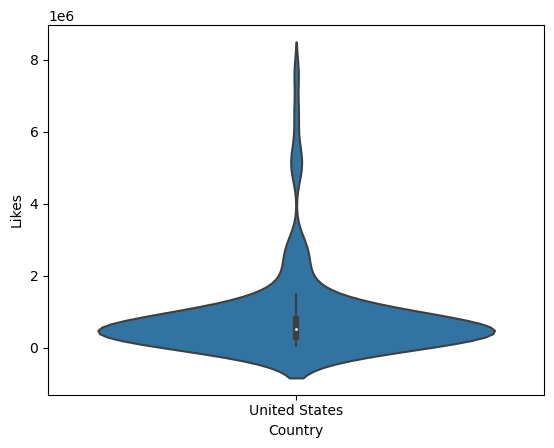

In [88]:
sns.violinplot(x = 'Country',y = 'Likes',data = j)

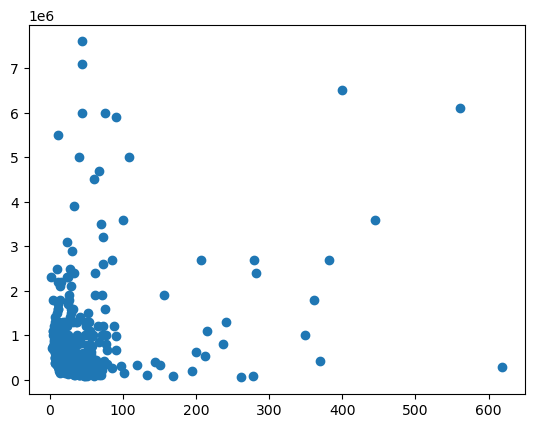

In [90]:
plt.scatter(data['Followers(M)'],data['Likes'])

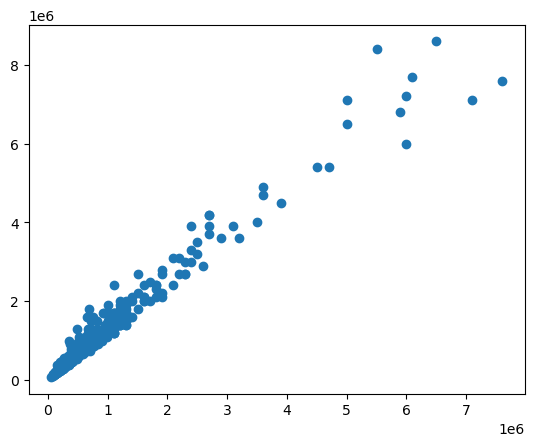

In [91]:
plt.scatter(data['Likes'],data['Views'])

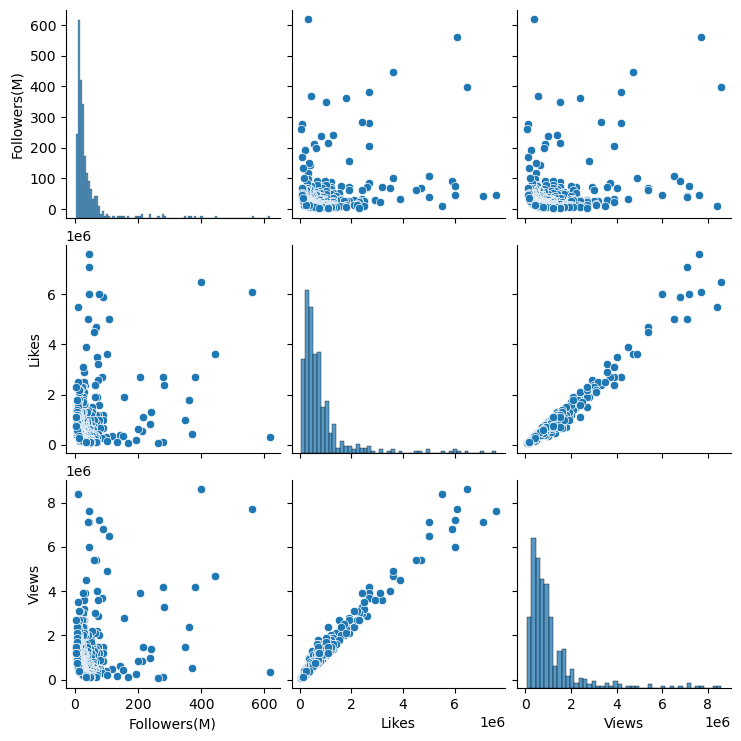

In [94]:
sns.pairplot(data = data,vars = ['Followers(M)','Likes','Views'])

<AxesSubplot:>

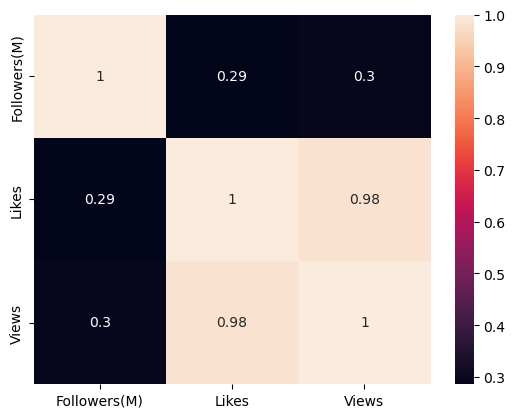

In [98]:
sns.heatmap(data[['Followers(M)','Likes','Views']].corr(),annot = True)

<function matplotlib.pyplot.show(close=None, block=None)>

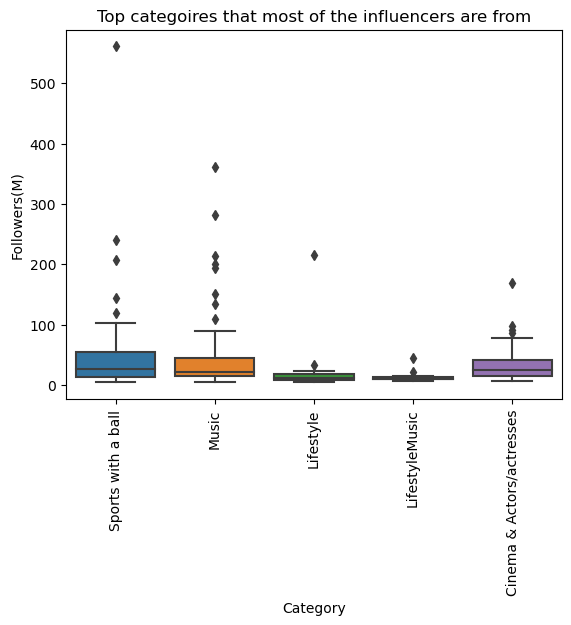

In [114]:
sns.boxplot(x = 'Category',y = 'Followers(M)',data = b)
plt.title('Top categoires that most of the influencers are from')
plt.xticks(rotation = 90)
plt.show